# Generalized Data Triage

Based on the dataset's filepath, a similarly-named folder will be created, which will house all created visualizations and column statistics.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import re
import pprint as pp
import datetime
import pathlib


filename = "/Users/dgrosz/Documents/PayPal/testData/Multifactor_Dataset.csv" #must insert absolute filepath
f_b = filename[:filename.rfind("/")]
d_b = filename[filename.rfind("/"):filename.rfind(".")]
VIZ_PATH = f_b + d_b + "_Viz_Stats/"
pathlib.Path(VIZ_PATH).mkdir(exist_ok=True)
print(VIZ_PATH)

/Users/dgrosz/Documents/PayPal/testData/Multifactor_Dataset_Viz_Stats/


## Read In Data

If a filename is provided and it is a CSV, the data will be loaded into X. If not, a random numerical dataset with one column of some missing data will be loaded. It must be assumed that the data can be read into memory and is clean to the point that pandas can read it in using its robust read_csv function.

In [4]:
def read_data(filename):
# to test with clean numerics
    if len(filename) == 0:
        sz = 50000
        X = pd.DataFrame(np.random.randint(0,100,size=(sz, 23)), columns=list('ABCDEFGHIJMNOPQRSTUVWXY'))
        nans = [1, np.nan] * int(sz / 2)
        Y = pd.DataFrame(nans, columns=list('Z'))
        X = pd.concat([X, Y], axis=1, sort=False)
        return X
    else:
        # to test with command line arg
        return pd.read_csv(filename, parse_dates=True)

    
print("Reading data...")
X = read_data(filename)
print("Data is read.")
X


Reading data...
Data is read.


,PRIORITY,ROOT_CAUSE_DOMAIN,OPENED_AT,TIME_TO_DETECT,TIME_TO_MITIGATE,TIME_TO_RECOVER,MONTH,DAY_OF_WEEK,HOUR_OF_DAY,SRE_PACKAGES,ROOT_CAUSE_TYPE,DETECTION_SOURCE,SYS_ID,Count_of_Work_Notes
0,P4 - Low,Unknown,2018-04-09 00:00:00 +0000,0.00,10.13,NaN,April,Monday,3,NaN,Other - Add Comments,Other - Add Comments,002a4766dbd5d30c50673a92ba961904,0
1,P4 - Low,NaN,2018-05-11 00:00:00 +0000,0.04,0.92,NaN,May,Friday,7,NaN,Other - Add Comments,Automation,002c2485db069f840d1b06e2ca9619d6,0
2,P4 - Low,NaN,2018-05-30 00:00:00 +0000,0.00,0.92,NaN,May,Wednesday,13,NaN,Other - Add Comments,Automation,002c778fdb169344371fc170ba961937,0
3,P3 - Medium,NaN,2018-04-28 00:00:00 +0000,0.17,1.29,NaN,April,Saturday,0,NaN,Other - Add Comments,Automation,0032d470dbfd5f808203abc5ca96197b,0
4,P4 - Low,Unknown,2018-04-14 00:00:00 +0000,0.42,0.00,NaN,April,Saturday,3,NaN,Other - Add Comments,Other - Add Comments,00f2f450db25d3080d1b06e2ca961947,0
5,P4 - Low,Unknown,2018-03-19 00:00:00 +0000,0.38,0.04,NaN,March,Monday,9,NaN,Other - Add Comments,Automation,00f3504cdb455f40b2ca6165ca96192a,0
6,P4 - Low,NaN,2018-05-31 00:00:00 +0000,0.13,1.96,NaN,May,Thursday,5,NaN,Other - Add Comments,Automation,00f553d7db12578450673a92ba96190f,0
7,P4 - Low,Unknown,2018-04-22 00:00:00 +0000,0.00,1.00,NaN,April,Sunday,16,NaN,Other - Add Comments,Automation,00f57c43dbe95788371fc170ba9619e8,0
8,P4 - Low,NaN,2018-05-30 00:00:00 +0000,0.08,2.08,NaN,May,Wednesday,6,NaN,Other - Add Comments,Automation,00f5da8bdb92d3840d1b06e2ca961944,0
9,P4 - Low,Unknown,2018-04-21 00:00:00 +0000,0.00,0.08,NaN,April,Saturday,9,NaN,Other - Add Comments,Automation,00f60622dbe9d7401896ec51ca96192a,0


## Gather Data Statistics

Going through each column, each column will be categorized as either a numerical or categorical column. 
<br> A column is numerical if it the column's values have a numerical type and have more than 10 unique values or no unique values (this means it's only missing values and will be easier to clean out later). Numerical columns collect boxplot data (min-25%-median-75%-max) as well as non-null data count, missing data count, and standard deviation.
<br> A column is categorical if it is perceived as an object or category column by pandas or is numerical and has between 1 and 10 unique values. Categorical columns also collect non-null and null data counts. Mode, mode frequency, and number of unique values is also collected.
<br> A column is a date if it is of the datetime form "%m/%d/%y %H:%M" or "%m-%d-%y %H:%M". The count, amount of missing data, minimum date, and maximum date will be recorded.
<br> For the entire dataset, row count, column count, missing data count, and missing data rate is collected.



In [5]:
def get_data_stats(X):
    df_stats_name = ["rows", "cols", "missing", "missing_rate"]
    df_stats_builder = [np.nan] * 4
    df_stats_builder[0], df_stats_builder[1] = int(X.shape[0]), int(X.shape[1])

    col_stats_name = ["count", "missing", "mean", "std", "min", "25%", "50%", "75%", "max", "unique", "top", "freq"]
    n_stats = len(col_stats_name)
    col_stats_toAppend = list(list())

    cat_data_valCounts = {}

    X_numeric, X_cat, X_date = pd.DataFrame(), pd.DataFrame(),pd.DataFrame()
    L_Xn, L_Xc, L_Xd = list(), list(), list()

    usable_col_names = list()
    for c in list(X):
        stat_c = [np.nan] * n_stats

        if X[c].dtype.name == 'category' or X[c].dtype.name == 'object':
            # is categorical
            stat_c = [X[c].count(), X[c].isnull().sum(), np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,
                      X[c].nunique(), X[c].mode().iloc[0], X[c].value_counts().max()]
            isDate = False

            #Linearly comb through column to see if date
            for r in X[c]:
                try:
                    dt = datetime.datetime.strptime(str(r), "%m/%d/%y %H:%M")
                    isDate = True
                    break
                except ValueError:
                    if not str(r).lower() == "nan" and not str(r).lower() == "na" and re.search('[a-zA-Z]', str(r)):
                        break
                    pass  # do nothing
                try:
                    dt = datetime.datetime.strptime(str(r), "%m-%d-%y %H:%M")
                    isDate = True
                    break
                except ValueError:
                    continue  # skip to next
            if isDate:
                print("Column \"" + c + "\" is a DATE")
                print("Converting column...")
                X[c] = pd.to_datetime(X[c])
                L_Xd.append(c)
                stat_c = [X[c].count(), X[c].isnull().sum(), np.nan, np.nan, X[c].min(), np.nan, np.nan, np.nan,
                          X[c].max(), np.nan, X[c].mode().iloc[0], X[c].value_counts().max()]
                print("done")
            else:
                print("Column \"" + c + "\" is a CATEGORY")
                cat_data_valCounts[c] = X[c].value_counts()
                L_Xc.append(c)
            usable_col_names.append(c)
        elif (np.issubdtype(X[c].dtype, np.number)):
            # then is numerical
            print("Column \"" + c + "\" is a NUMERICAL")
            stat_c = [X[c].count(), X[c].isnull().sum(), X[c].mean(), X[c].std(), X[c].min(), X[c].quantile(.25),
                      X[c].median(), X[c].quantile(.75), X[c].max(), np.nan, np.nan, np.nan]
            n_unique = float(X[c].nunique())
            if n_unique > 10 or n_unique == 0:
                L_Xn.append(c)
            else:
                cat_data_valCounts[c] = X[c].value_counts()
                L_Xc.append(c)
                print("But column \"" + c + "\" is corrected to a CATEGORY because there are " + str(
                    int(n_unique)) + " unique numerical values.")
            usable_col_names.append(c)
        else:
            print("Column \"" + c + "\" is skipped because it is of an UNIDENTIFIED type.")
            print(X[c].dtype)
            continue
        col_stats_toAppend.append(stat_c)

    col_stats = pd.DataFrame(
        pd.DataFrame(data=col_stats_toAppend, columns=col_stats_name, index=usable_col_names)).transpose()

    for c in X:
        if c in L_Xn:
            X_numeric = pd.concat([X_numeric, X[c]], axis=1, sort=False)
        elif c in L_Xc:
            X_cat = pd.concat([X_cat, X[c]], axis=1, sort=False)
        elif c in L_Xd:
            X_date = pd.concat([X_date, X[c]], axis=1, sort=False)

    df_stats_builder[2] = int(col_stats.transpose()["missing"].sum())
    df_stats_builder[3] = float(df_stats_builder[2]) / (df_stats_builder[1] * df_stats_builder[0])
    df_stats = pd.DataFrame(np.array(df_stats_builder).reshape(1, 4), columns=df_stats_name)
    col_stats.to_csv(path_or_buf=VIZ_PATH + "COLUMN_STATS.csv")
    return X_numeric, X_cat, X_date, df_stats, col_stats, cat_data_valCounts

print("Getting stats...\n")
X_numeric, X_cat, X_date, df_stats, col_stats, cat_data_valCounts = get_data_stats(X)
print("\ndone.")

Getting stats...

Column "PRIORITY" is a CATEGORY
Column "ROOT_CAUSE_DOMAIN" is a CATEGORY


Column "OPENED_AT" is a CATEGORY
Column "TIME_TO_DETECT" is a NUMERICAL
Column "TIME_TO_MITIGATE" is a NUMERICAL
Column "TIME_TO_RECOVER" is a NUMERICAL
Column "MONTH" is a CATEGORY
Column "DAY_OF_WEEK" is a CATEGORY
Column "HOUR_OF_DAY" is a NUMERICAL
Column "SRE_PACKAGES" is a CATEGORY
Column "ROOT_CAUSE_TYPE" is a CATEGORY
Column "DETECTION_SOURCE" is a CATEGORY


Column "SYS_ID" is a CATEGORY
Column "Count_of_Work_Notes" is a NUMERICAL

done.


In [6]:
print("df_stats below")
print(df_stats)

df_stats below
      rows  cols  missing  missing_rate
0  31032.0  14.0  78652.0      0.181039


In [7]:
print("col_stats below")
print(col_stats)

col_stats below
         PRIORITY ROOT_CAUSE_DOMAIN                  OPENED_AT TIME_TO_DETECT  \
count       31032             14287                      31032          31032   
missing         0             16745                          0              0   
mean          NaN               NaN                        NaN        0.73395   
std           NaN               NaN                        NaN        19.6622   
min           NaN               NaN                        NaN              0   
25%           NaN               NaN                        NaN              0   
50%           NaN               NaN                        NaN           0.04   
75%           NaN               NaN                        NaN           0.21   
max           NaN               NaN                        NaN        2194.88   
unique          5                11                        465            NaN   
top      P4 - Low           Unknown  2018-05-21 00:00:00 +0000            NaN   
freq        

In [8]:
print("X_numeric below")
X_numeric

X_numeric below


,TIME_TO_DETECT,TIME_TO_MITIGATE,TIME_TO_RECOVER,HOUR_OF_DAY,Count_of_Work_Notes
0,0.00,10.13,NaN,3,0
1,0.04,0.92,NaN,7,0
2,0.00,0.92,NaN,13,0
3,0.17,1.29,NaN,0,0
4,0.42,0.00,NaN,3,0
5,0.38,0.04,NaN,9,0
6,0.13,1.96,NaN,5,0
7,0.00,1.00,NaN,16,0
8,0.08,2.08,NaN,6,0
9,0.00,0.08,NaN,9,0


In [9]:
print("X_cat below")
X_cat

X_cat below


,PRIORITY,ROOT_CAUSE_DOMAIN,OPENED_AT,MONTH,DAY_OF_WEEK,SRE_PACKAGES,ROOT_CAUSE_TYPE,DETECTION_SOURCE,SYS_ID
0,P4 - Low,Unknown,2018-04-09 00:00:00 +0000,April,Monday,NaN,Other - Add Comments,Other - Add Comments,002a4766dbd5d30c50673a92ba961904
1,P4 - Low,NaN,2018-05-11 00:00:00 +0000,May,Friday,NaN,Other - Add Comments,Automation,002c2485db069f840d1b06e2ca9619d6
2,P4 - Low,NaN,2018-05-30 00:00:00 +0000,May,Wednesday,NaN,Other - Add Comments,Automation,002c778fdb169344371fc170ba961937
3,P3 - Medium,NaN,2018-04-28 00:00:00 +0000,April,Saturday,NaN,Other - Add Comments,Automation,0032d470dbfd5f808203abc5ca96197b
4,P4 - Low,Unknown,2018-04-14 00:00:00 +0000,April,Saturday,NaN,Other - Add Comments,Other - Add Comments,00f2f450db25d3080d1b06e2ca961947
5,P4 - Low,Unknown,2018-03-19 00:00:00 +0000,March,Monday,NaN,Other - Add Comments,Automation,00f3504cdb455f40b2ca6165ca96192a
6,P4 - Low,NaN,2018-05-31 00:00:00 +0000,May,Thursday,NaN,Other - Add Comments,Automation,00f553d7db12578450673a92ba96190f
7,P4 - Low,Unknown,2018-04-22 00:00:00 +0000,April,Sunday,NaN,Other - Add Comments,Automation,00f57c43dbe95788371fc170ba9619e8
8,P4 - Low,NaN,2018-05-30 00:00:00 +0000,May,Wednesday,NaN,Other - Add Comments,Automation,00f5da8bdb92d3840d1b06e2ca961944
9,P4 - Low,Unknown,2018-04-21 00:00:00 +0000,April,Saturday,NaN,Other - Add Comments,Automation,00f60622dbe9d7401896ec51ca96192a


# Basic Column Plots

## Plot Numericals

This function plots boxplots of each numerical column, each column getting a boxplot with and without outliers (outliers are defined as any values above 1.5 times the interquartile range). Using the boxplot with outliers, one can notice how far scattered the data is, perhaps to see if a few extreme outliers are heavily impacting the mean/standard deviation. On the boxplot without the outliers, one can simply look at the nature of the middle of the data. 

Plotting...


done with subplot #2
done with subplot #3


done with subplot #4
done with subplot #5


done with subplot #6


All Done with plot #1


done with subplot #2
done with subplot #3


done with subplot #4
done with subplot #5
done with subplot #6


All Done with plot #1


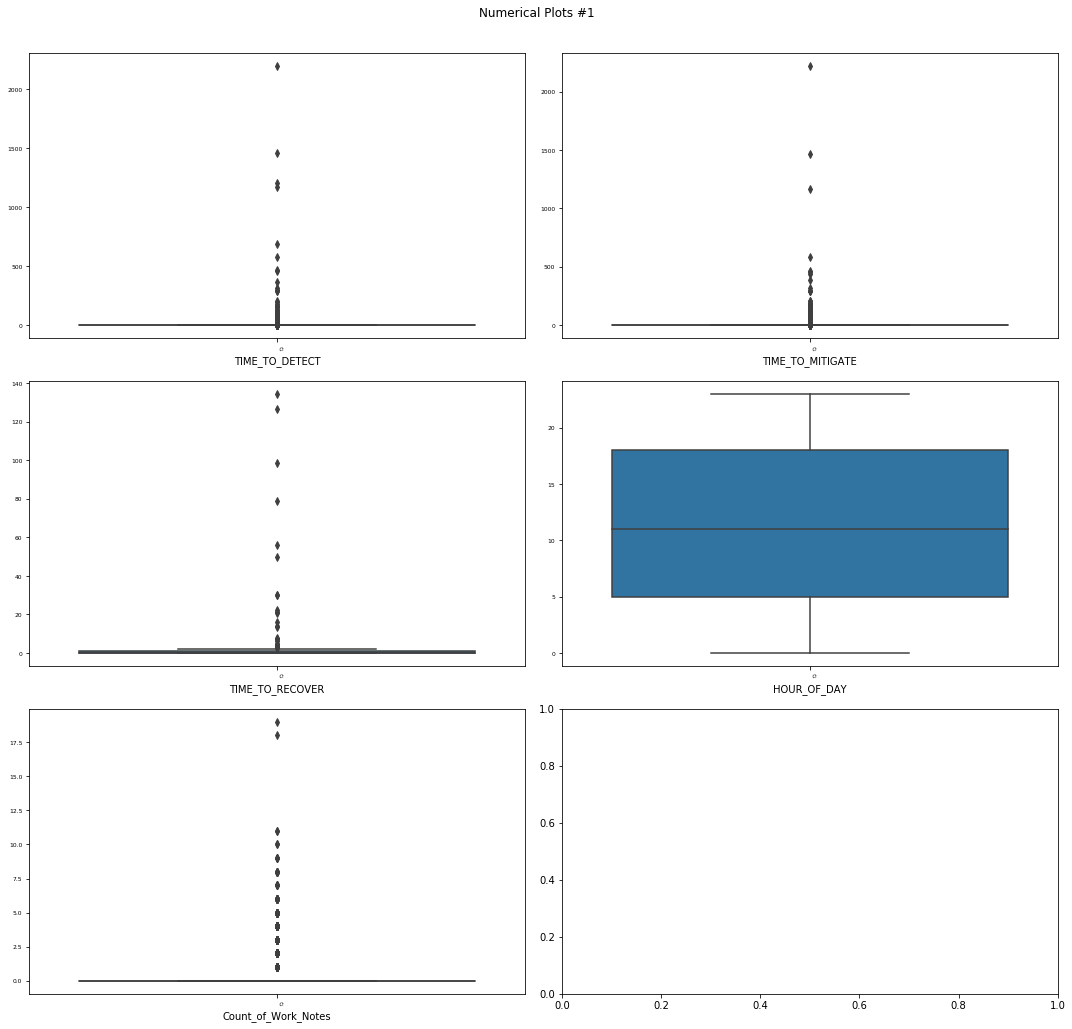

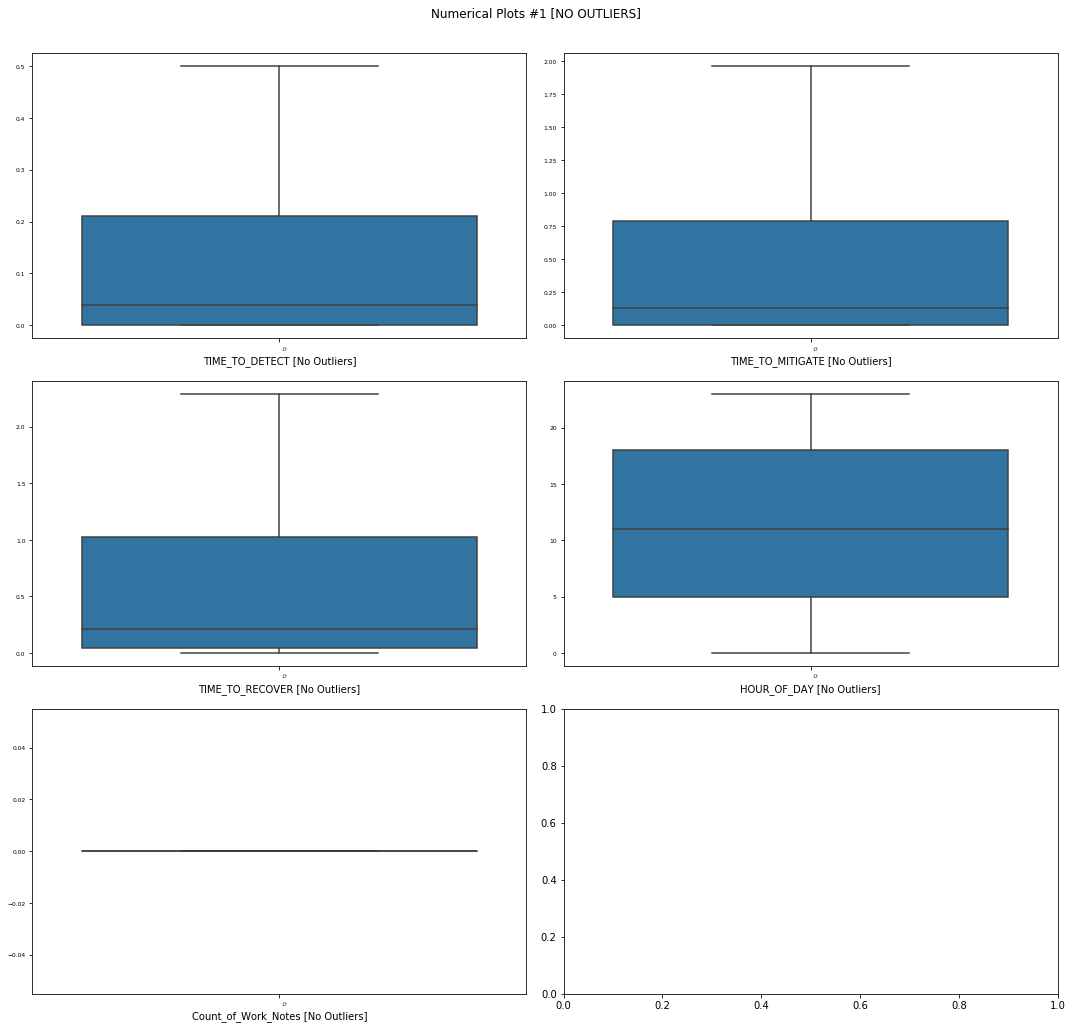

In [10]:
def plot_num_val(X, max_r, max_c):
    num_fig = math.ceil(X.shape[1] / (max_r * max_c))
    figs = [0] * num_fig * 2
    L_Xn = list(X)

    for i in range(0, num_fig):
        sub_r = max_r if math.ceil(math.sqrt(int(X.shape[1]))) > max_r else math.ceil(math.sqrt(int(X.shape[1])))
        sub_c = max_c if math.ceil(int(X.shape[1]) / sub_r) > max_c else math.ceil(int(X.shape[1]) / sub_r)
        figs[i] = plt.subplots(nrows=sub_r, ncols=sub_c, figsize = (15,15))
        plt.suptitle('Numerical Plots #' + str(i + 1))
        batch = 1
        curr_dim = sub_r * sub_c
        for j in range(i * curr_dim, (i + 1) * curr_dim):
            if j >= len(L_Xn):
                break
            plt.subplot(sub_r, sub_c, batch)
            sns.boxplot(data=X[L_Xn[j]])  # , kind = 'box')
            plt.xticks(rotation=-45, ha = 'left')
            plt.tight_layout()
            plt.tick_params(axis='both', which='major', labelsize=6)
            plt.xlabel(L_Xn[j])
            plt.tight_layout(rect=[0, 0.03, 1, 0.95])
            batch += 1
            if batch > (sub_c * sub_r):
                break
            print("done with subplot #" + str(batch))
        plt.savefig(VIZ_PATH + "NUMPLOT_" + str(i) + ".png", format="png")
        print("All Done with plot #" + str(i + 1))

    for i in range(0, num_fig):
        sub_r = max_r if math.ceil(math.sqrt(int(X.shape[1]))) > max_r else math.ceil(math.sqrt(int(X.shape[1])))
        sub_c = max_c if math.ceil(int(X.shape[1]) / sub_r) > max_c else math.ceil(int(X.shape[1]) / sub_r)
        figs[i + num_fig] = plt.subplots(nrows=sub_r, ncols=sub_c, figsize = (15,15))
        plt.suptitle('Numerical Plots #' + str(i + 1) + " [NO OUTLIERS]")
        batch = 1
        curr_dim = sub_r * sub_c
        for j in range(i * curr_dim, (i + 1) * curr_dim):
            if j >= len(L_Xn):
                break
            plt.subplot(sub_r, sub_c, batch)
            sns.boxplot(data=X[L_Xn[j]], showfliers = False)
            plt.xticks(rotation=-45, ha = 'left')
            plt.tick_params(axis='both', which='major', labelsize=6)
            plt.xlabel(str(L_Xn[j]) + " [No Outliers]")
            plt.tight_layout(rect=[0, 0.03, 1, 0.95])
            batch += 1
            if batch > (sub_c * sub_r):
                break
            print("done with subplot #" + str(batch))
        plt.savefig(VIZ_PATH + "NUMPLOT_" + str(i) + "_[NO OUTLIERS].png", format="png")
        print("All Done with plot #" + str(i + 1))
        
if X_numeric.shape[1] > 0:
    print("Plotting...")
    plot_num_val(X_numeric, 4, 4)

## Data Cleaning

For any column, if there is too much missing data past the m_thresh threshold, then the column is dropped. If the column is categorical, the column can also be dropped for 

In [11]:
def data_clean(X, cat_data_valCounts, col_stats, n_freq, f_thresh, m_thresh):
    n_rows = X.shape[0]
    dropped_cols = list()
    for c in X:
        #print(cat_data_valCounts[c].head(n_freq).iloc[0])
        freq_sum = float(cat_data_valCounts[c].head(n_freq).iloc[0].sum()) if c in cat_data_valCounts.keys() else n_rows
        if freq_sum / n_rows < f_thresh or float(col_stats.loc["missing", c]) / n_rows > m_thresh:
            X.drop(labels=[c], axis = 1, inplace=True)
            print("Dropped \"" + str(c) + "\"")
            dropped_cols.append(c)
    return X, dropped_cols

X_num_cleaned, X_cat_cleaned = pd.DataFrame(), pd.DataFrame()
if X_numeric.shape[1] > 0:
    n_freq = 5
    FREQ_THRESH = 0.3
    MISS_THRESH = 0.5
    print("Cleaning Numericals...\n")
    X_num_cleaned, num_dropped = data_clean(X_numeric, cat_data_valCounts, col_stats, n_freq, FREQ_THRESH, MISS_THRESH)
    print("\n\nCleaning Categoricals...\n")
    X_cat_cleaned, cat_dropped = data_clean(X_cat, cat_data_valCounts, col_stats, n_freq, FREQ_THRESH, MISS_THRESH)

Cleaning Numericals...

Dropped "TIME_TO_RECOVER"


Cleaning Categoricals...

Dropped "ROOT_CAUSE_DOMAIN"
Dropped "OPENED_AT"
Dropped "DAY_OF_WEEK"
Dropped "SRE_PACKAGES"
Dropped "SYS_ID"


## Plot Categoricals

Regardless of the quality of the data (i.e. amount of missing data), every perceived categorical column will be analyzed, and the proportion of each of the top 5 (can change this by adjusting n_freq) categories. This plot will give a view of how much the top 5 categories encompass the data, where it is useless if the top 5 categories represent too little of all the data.

done with plot #1


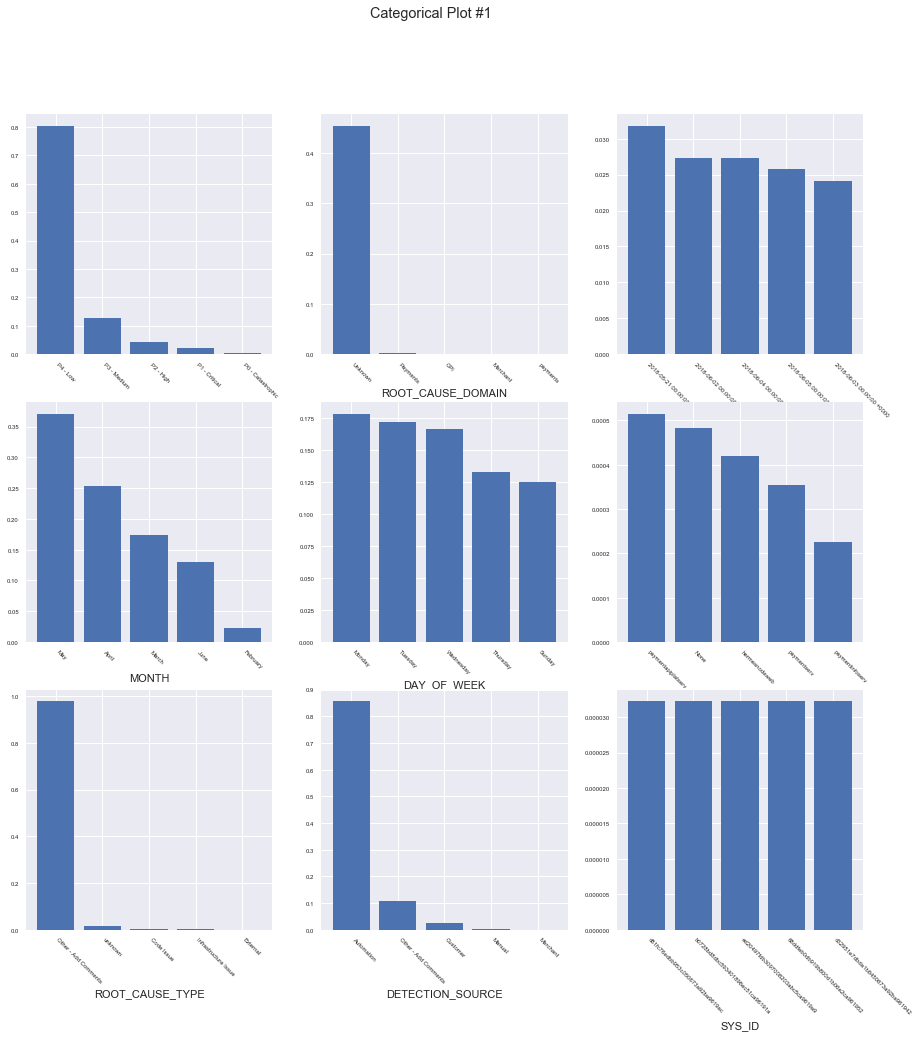

In [20]:
def plot_cat_val(cat_data_valCounts, n_rows, n_freq, max_r, max_c):
    cat_len = len(cat_data_valCounts.keys())
    if (cat_len > 0):

        sub_cat_r = max_r if math.ceil(math.sqrt(cat_len)) > max_r else math.ceil(math.sqrt(cat_len))
        sub_cat_c = max_c if math.ceil(cat_len / sub_cat_r) > max_c else math.ceil(cat_len / sub_cat_r)
        num_fig = math.ceil(float(cat_len) / (max_r * max_c))
        cdvc_keys = list(cat_data_valCounts.keys())
        curr_dim = sub_cat_c * sub_cat_r
        figs_c = [0] * num_fig
        for f_c in range(0, num_fig):
            sub_cat_r = max_r if math.ceil(math.sqrt(cat_len)) > max_r else math.ceil(math.sqrt(cat_len))
            sub_cat_c = max_c if math.ceil(cat_len / sub_cat_r) > max_c else math.ceil(cat_len / sub_cat_r)
            figs_c[f_c] = plt.subplots(nrows=sub_cat_r, ncols=sub_cat_c, figsize=(15,15))
            batch = 1
            for i in range(f_c * curr_dim, (f_c + 1) * curr_dim):
                if i >= cat_len:
                    break
                toPlt = cat_data_valCounts[cdvc_keys[i]].head(n_freq)
                plt.subplot(sub_cat_r, sub_cat_c, batch)
                plt.suptitle("Categorical Plot #" + str(f_c + 1))
                plt.bar(toPlt.index, toPlt / float(n_rows))
                plt.xticks(rotation=-45, ha = 'left')
                plt.xlabel(cdvc_keys[i])
                plt.tick_params(axis='both', which='major', labelsize=6)
                batch += 1
            print("done with plot #" + str(f_c + 1))
            plt.savefig(VIZ_PATH + "CATPLOT_" + str(f_c) + ".png", format="png")
    else:
        print("No categories so no category frequency graph.")

n_freq = 5
if X_cat.shape[1] > 0:
    plot_cat_val(cat_data_valCounts, X.shape[0], n_freq, 4, 4)

# Correlation Plots

## Numerical Correlations Heatmap

With the list of cleaned numerical columns, calculate the pairwise correlations and depict them as squares on a grid heatmap, with the color corresponding to the strength of the correlation.

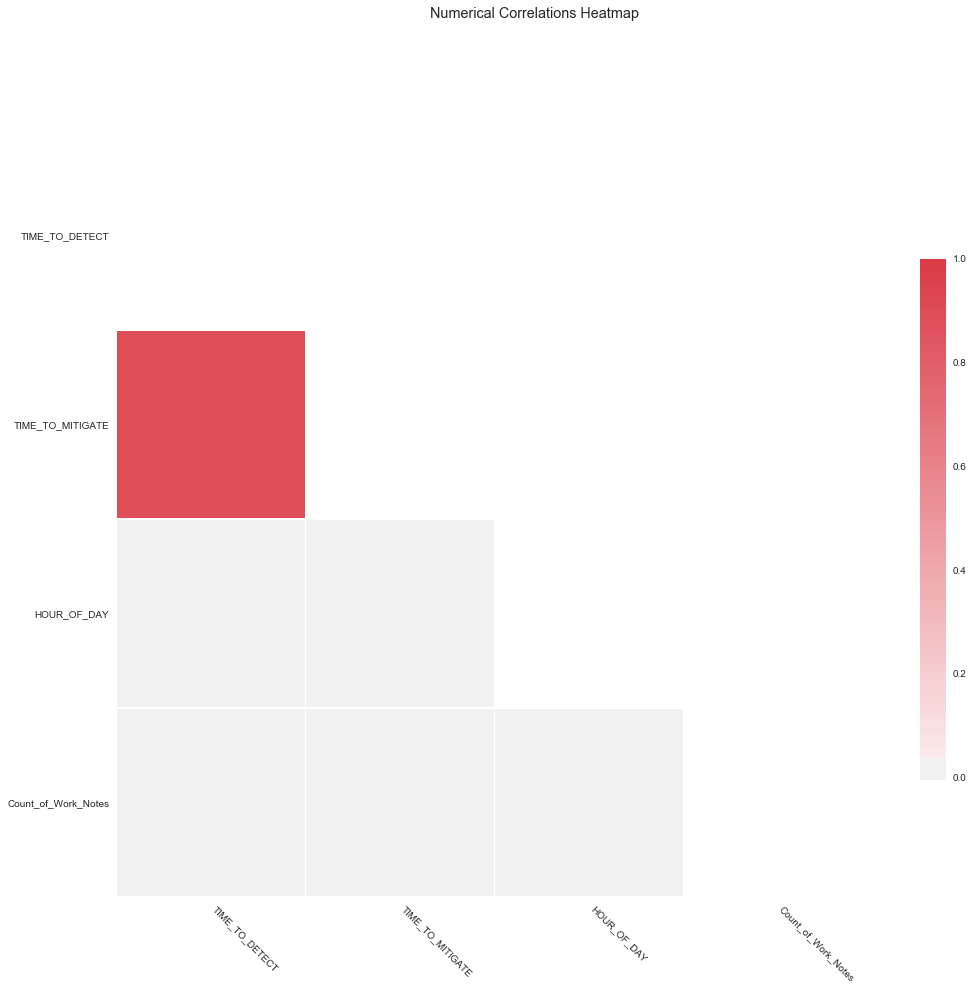

In [13]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i + 1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop


def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

def plot_num_hm(X_num):
    sns.set(style="white")
    corr = X_num.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig_corr1, ax_corr1 = plt.subplots(figsize=(15,15))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    plt.suptitle("Numerical Correlations Heatmap")

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.xticks(rotation=-45, ha = 'left')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig(VIZ_PATH + "CORRELATION_HEATMAP.png", format="png")

if X_numeric.shape[1] > 0:
    plot_num_hm(X_num_cleaned)

## Pairwise Correlation Plot

Plot the top k pairwise correlations between all columns. Adjust k higher if too many pairs are arbitrarily highly correlated since columns can sometimes be highly correlated simply by definition.

Top Absolute Correlations


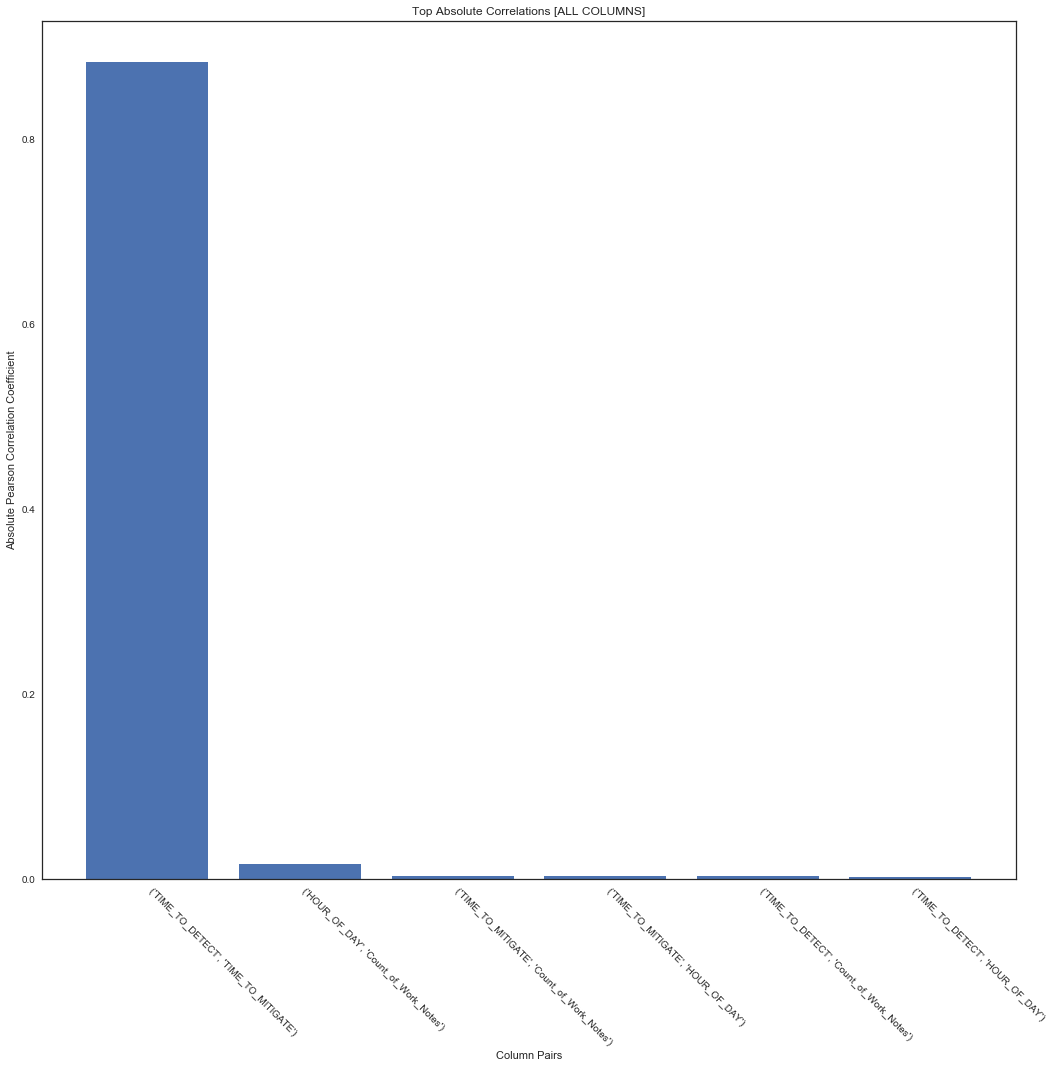

In [14]:
def plot_pairwise_corr(X_num, k):
    print("Top Absolute Correlations")
    top_corr = get_top_abs_correlations(X_num, k)
    top_corr.index = list(map(str, top_corr.index.values))
    fig_pc, ax_pc = plt.subplots(figsize=(15,15))
    plt.bar(top_corr.index, top_corr)
    plt.title("Top Absolute Correlations [ALL COLUMNS]")
    plt.xticks(rotation=-45, ha = 'left')
    plt.ylabel("Absolute Pearson Correlation Coefficient")
    plt.xlabel("Column Pairs")
    plt.tick_params(axis='both', which='major')
    plt.tight_layout()
    plt.savefig(VIZ_PATH + "PAIRWISE_CORR.png", format="png")
    
if X_numeric.shape[1] > 0:
    k = 15
    plot_pairwise_corr(X_num_cleaned, k)

## Target Correlation Plots

After choosing a target column (which must be one of the "cleaned" numerical columns), this plot will graph the correlation (not absolute) every other column has to it. 

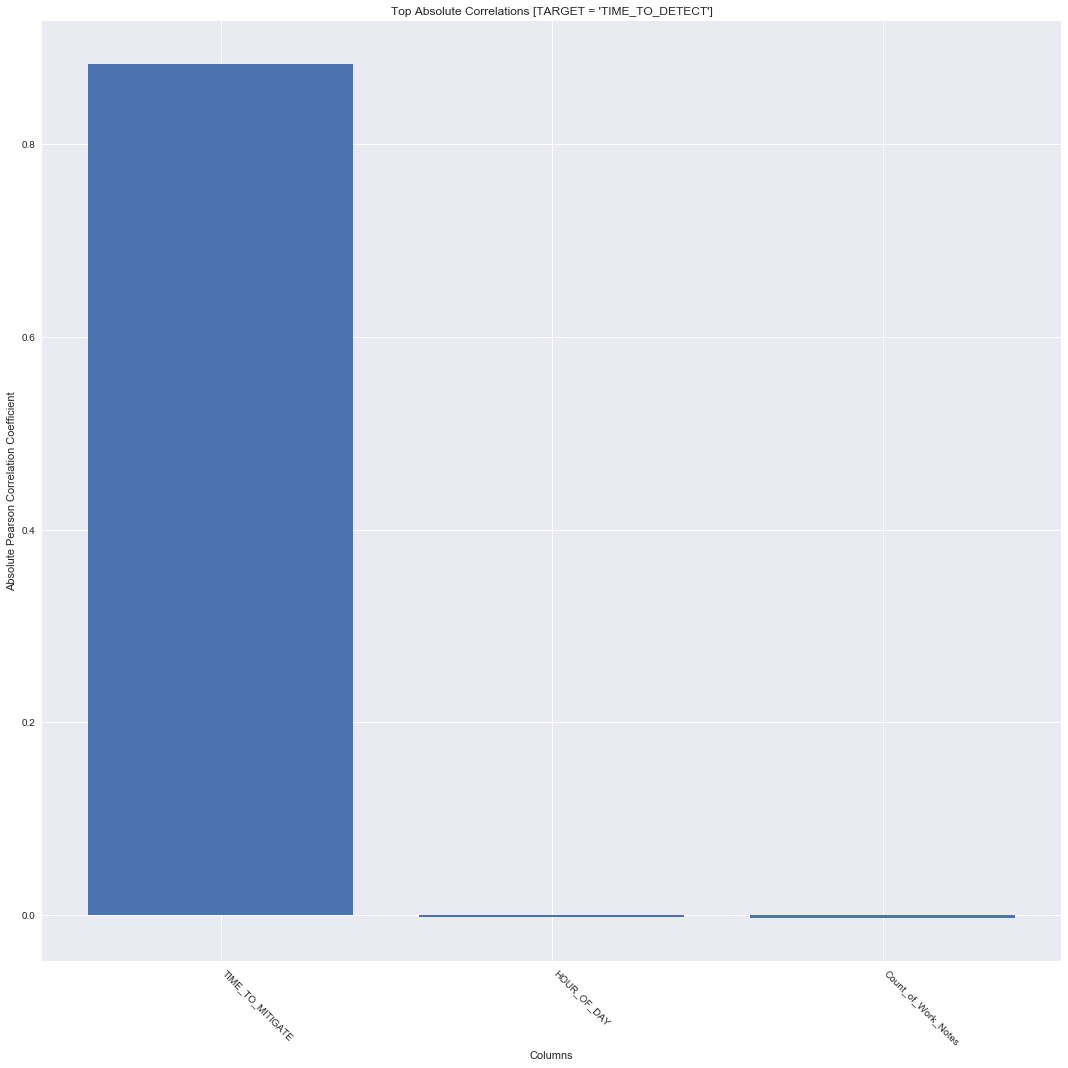

In [18]:
def plot_target_corr(targetCol, X_num):
    target_corr = X_num.corrwith(X_num[targetCol])
    target_corr = target_corr.drop([targetCol])
    fig_tc, ax_tc = plt.subplots(figsize=(15,15))
    plt.title("Top Absolute Correlations [TARGET = \'" + targetCol + "\']")
    plt.xticks(rotation=-45, ha = 'left')
    plt.ylabel("Absolute Pearson Correlation Coefficient")
    plt.xlabel("Columns")
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.bar(target_corr.index, target_corr)
    plt.tight_layout()
    plt.savefig(VIZ_PATH + "TARGET_CORR.png", format="png")

if X_numeric.shape[1] > 0:
    target = "TIME_TO_DETECT" #change to desired column name
    plot_target_corr(target, X_numeric)

## Categorical vs. Numerical Plots

After categorical and numerical data is cleaned, these functions map numbers to each of the top 5 (can be toggled) categories for each categorical in order for seaborn to discern and plot them with respect to each numerical column. The result is a plot grid, where each plot represents the top 5 categories of a categorical column plot against the values of a numerical column, which allows one to see if different categories affect the values of numerical variables. Jitter and alpha is added in order for one to possibly visually discern such insights. 
If there is more than 10 numerical or categorical columns, a new figure is produced such that each categorical column "hits" each numerical column. For example, if there are 16  categoricals vs. 24 numericals, the figures would be:
<br>
categories 1-10 vs. numericals 1-10 <br>
categories 1-10 vs. numericals 11-20 <br>
categories 1-10 vs. numericals 21-24 <br>
categories 11-16 vs. numericals 1-10 <br>
categories 11-16 vs. numericals 11-20 <br>
categories 11-16 vs. numericals 21-24 <br>

mapping...
{'DETECTION_SOURCE': {'Automation': 1,
                      'Customer': 3,
                      'Manual': 4,
                      'Merchant': 5,
                      'Other - Add Comments': 2},
 'MONTH': {'April': 2, 'February': 5, 'June': 4, 'March': 3, 'May': 1},
 'PRIORITY': {'P0 - Catastrophic': 5,
              'P1 - Critical': 4,
              'P2 - High': 3,
              'P3 - Medium': 2,
              'P4 - Low': 1},
 'ROOT_CAUSE_TYPE': {'Code Issue': 3,
                     'External': 5,
                     'Infrastructure Issue': 4,
                     'Other - Add Comments': 1,
                     'unknown': 2}}
applying mapping...


done mapping.
begin plotting...
Creating categorical vs. numerical correlation matrix graph...


Done!


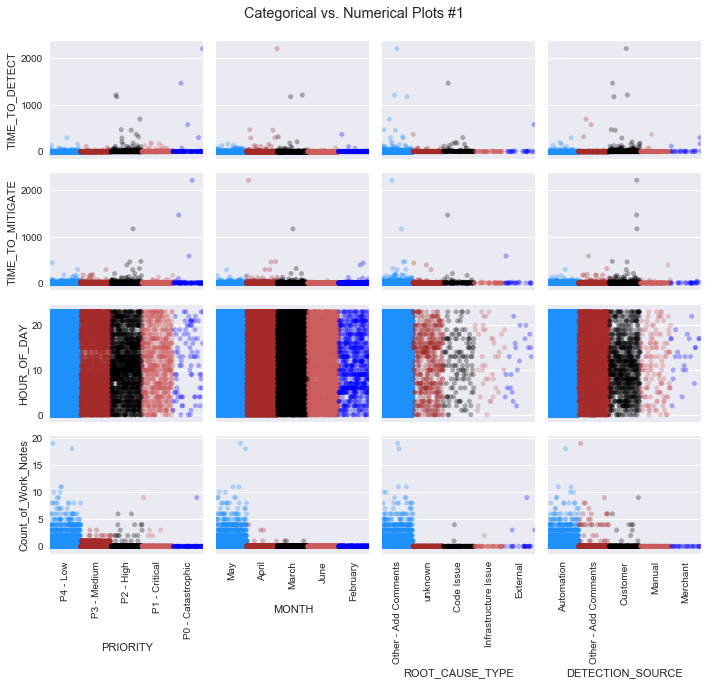

In [16]:
######################### CREATE CATEGORICAL VS NUMERICAL PLOTS ###################################
def map_col(X, cat_data_valCounts, n_freq):
    col_mappings = dict(dict())
    for c in X:
        if c in cat_data_valCounts.keys():
            map_build = {}
            cnt = 1
            for catcol in list(cat_data_valCounts[c].head(n_freq).index):
                map_build[catcol] = cnt
                cnt += 1
            col_mappings[c] = map_build
    pp.pprint(col_mappings)
    return col_mappings

def convert_cat_col(X_cat, col_mappings, cat_data_valCounts, n_freq):
    X_catmap = X_cat
    for c in X_cat:
        X_catmap[c] = X_cat[c].apply(
            lambda x: col_mappings[c][x] if x in cat_data_valCounts[c].head(n_freq).index else 0)
    return X_catmap


def plot_cat_vs_num_corr(X_catmap, X_num, color_ordered, cat_data_valCounts, n_freq, max_r, max_c):
    cat_dim, num_dim = X_catmap.shape[1], X_num.shape[1]
    cat_dim_fig, num_dim_fig = math.ceil(float(cat_dim) / max_c),  math.ceil(float(num_dim) / max_r)
    cat_names, num_names = list(X_catmap), list(X_num)
    # print(cat_dim_fig)
    # print(num_dim_fig)
    #figs_cn = [0] * cat_dim_fig * num_dim_fig
    OS_order = range(1, n_freq + 1)

    X_numeric_nonan = X_num.fillna(0)
    batch = 1
    print("begin plotting...")
    for f_c in range(0, cat_dim_fig):
        for f_n in range(0, num_dim_fig):
            #prepare batch of data to plot
            num_max = (f_n + 1) * max_r if (f_n + 1) * max_r < X_num.shape[1] else X_num.shape[1] - 1
            cat_max = (f_c + 1) * max_c if (f_c + 1) * max_c < X_catmap.shape[1] else X_catmap.shape[1] - 1
            X_num_batch = X_numeric_nonan.loc[:, num_names[f_n * max_r]:num_names[num_max]]
            X_cat_batch = X_catmap.loc[:, cat_names[f_c * max_c]:cat_names[cat_max]]

            X_batch = pd.concat([X_num_batch, X_cat_batch], axis=1, sort=False)

            #begin plotting
            #figs_cn[batch - 1] = plt.subplots()
            sns.set()
            sns.set_style("ticks")
            sns.set_style('darkgrid')
            print("Creating categorical vs. numerical correlation matrix graph...")
            g = sns.PairGrid(X_batch, x_vars=list(X_cat_batch), y_vars=list(X_num_batch))
            g.map(sns.stripplot, order=OS_order, jitter=0.5, s=5, alpha=0.3, palette=color_ordered)
            g.fig.suptitle("Categorical vs. Numerical Plots #" + str(batch))
            for j in range(0, len(list(X_cat_batch))):
                g.axes[0, j].set_xticklabels(list(cat_data_valCounts[list(X_cat_batch)[j]].head(n_freq).index))
            plt.rcParams["xtick.labelsize"] = 4
            for ax in g.axes.flat:
                for label in ax.get_yticklabels():
                    label.set_rotation(0)
            for ax in g.axes.flat:
                for label in ax.get_xticklabels():
                    label.set_rotation(90)
            plt.savefig(VIZ_PATH + "CAT_VS_NUM_CORR_PLOT_CATBATCH_" + str(f_c) + "_NUMBATCH_" + str(f_n) + ".png", format="png")
            plt.tight_layout(rect=[0, 0.03, 1, 0.95])
            batch += 1
    print("Done!")

#applying mapping takes a while since every datapoint is encountered and changed
if (len(list(X_cat_cleaned)) * len(list(X_num_cleaned))) > 0:
    color_ordered = ['dodgerblue', 'brown', 'black', 'indianred', 'blue', 'darkviolet', 'darkgoldenrod', 'darkcyan',
                         'green', 'red', 'darkorange', 'olive', 'orchid', 'gray', 'yellowgreen', 'sandybrown']
    print("mapping...")
    col_mapping = map_col(X_cat_cleaned, cat_data_valCounts, n_freq)
    print("applying mapping...")
    X_catmap = convert_cat_col(X_cat_cleaned, col_mapping, cat_data_valCounts, n_freq)
    print("done mapping.")
    plot_cat_vs_num_corr(X_cat_cleaned, X_num_cleaned, color_ordered, cat_data_valCounts, n_freq, 10, 10)
    
else:
    print("No categories and/or numerical columns, so no category vs. numerical plot.")

## Date Plots

For all the cleaned date columns, frequency of occurences of certain dates based on day and month are plotted.

In [17]:
def plot_date_val(X_date, X_num):
    figs = [0] * len(list(X_date)) * 2
    i = 0
    for d in X_date:
        Xd = X_date[d].dropna()
        n_rows = Xd.shape[0]
        b = pd.DataFrame(index = Xd)
        try:
            gbc_d = pd.DataFrame(Xd.groupby(by=[Xd.dt.day.rename('d'), Xd.dt.month.rename('m'), Xd.dt.year.rename('y')]).count())
        except AttributeError:
            pass
        try:
            gbc_m = pd.DataFrame(Xd.groupby(by=[Xd.dt.month.rename('m'), Xd.dt.year.rename('y')]).count())
        except AttributeError:
            pass
        #plot day granularity
        new_index = [gbc_d.index.map('{0[1]}/{0[0]}/{0[2]}'.format)]        
        gbc_d = pd.DataFrame(gbc_d.reset_index().drop(['d', 'm', 'y'], axis=1))
        gbc_d.index = new_index
        gbc_d.index = gbc_d.index.map(pd.to_datetime)
        figs[i] = plt.subplots(figsize=(15,15))
        plt.suptitle("Column \"" + d + "\" - Datetime Plot By Day")
        plt.xticks(rotation=-45, ha = 'left')
        plt.yticks(rotation=0)
        plt.tick_params(axis='both', which='major', labelsize=12)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.plot(gbc_d.sort_index())
        
        #plot month granularity
        new_index = [gbc_m.index.map('{0[0]}/{0[1]}'.format)]
        gbc_m = pd.DataFrame(gbc_m.reset_index().drop(['m', 'y'], axis=1))
        gbc_m.index = new_index
        gbc_m.index = gbc_m.index.map(pd.to_datetime)
        figs[i + 1] = plt.subplots(figsize=(15,15))
        plt.suptitle("Column \"" + d + "\" - Datetime Plot By Month")
        plt.xticks(rotation=-45, ha = 'left')
        plt.yticks(rotation=0)
        plt.tick_params(axis='both', which='major', labelsize=12)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.plot(gbc_m.sort_index())
        i += 2
if X_date.shape[1] > 0:        
    print("Plotting...")
    plot_date_val(X_date, X_num_cleaned)
    print("Done Plotting.")